In [1]:
import matplotlib.pyplot as plt  # matplotlib for some plotting
import numpy as np  # numeric python functions
import pandas as pd  # need this to load our data from the csv files

from pyconturb import gen_turb, gen_spat_grid  # generate turbulence, useful helper
from pyconturb.sig_models import iec_sig  # IEC 61400-1 turbulence std dev
from pyconturb.spectral_models import kaimal_spectrum  # Kaimal spectrum
from pyconturb.wind_profiles import constant_profile, power_profile  # wind-speed profile functions

from _nb_utils import plot_slice
import h5py

## Unconstrained Turbulence ##

In [21]:
# y = np.linspace(-5, 5, 3) #11) #22)  # 11 lateral points from -50 to 50 (center @ 0)
# z = np.linspace(0.5, 10.5, 5) #13) # 26)  # 13 vertical points from 40 to 160 (center @ 100)

# to match ethan's example
# ny = 41
# nz = 20
# y = np.linspace(-10.0, 10.0, ny) #11) #22)  # 11 lateral points from -50 to 50 (center @ 0)
# z = np.linspace(0.00001, 10.0, nz) #13) # 26)  # 13 vertical points from 40 to 160 (center @ 100)

# to match pvade sim
ny = 80
nz = 80 #40
y = np.linspace(-10.0, 10.0, ny) #11) #22)  # 11 lateral points from -50 to 50 (center @ 0)
z = np.linspace(0.00001, 20.0, nz) #10.0, nz) #13) # 26)  # 13 vertical points from 40 to 160 (center @ 100)

spat_df = gen_spat_grid(y, z)  # if `comps` not passed in, assumes all 3 components are wanted
spat_df.head()  # look at the first few rows

,u_p0,v_p0,w_p0,u_p1,v_p1,w_p1,u_p2,v_p2,w_p2,u_p3,...,w_p6396,u_p6397,v_p6397,w_p6397,u_p6398,v_p6398,w_p6398,u_p6399,v_p6399,w_p6399
k,0.00000,1.00000,2.00000,0.000000,1.000000,2.000000,0.000000,1.000000,2.000000,0.000000,...,2.000000,0.000000,1.000000,2.000000,0.000000,1.000000,2.000000,0.0,1.0,2.0
x,0.00000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
y,-10.00000,-10.00000,-10.00000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.0,10.0,10.0
z,0.00001,0.00001,0.00001,0.253174,0.253174,0.253174,0.506339,0.506339,0.506339,0.759503,...,19.240507,19.493671,19.493671,19.493671,19.746836,19.746836,19.746836,20.0,20.0,20.0


In [22]:
t_final = 1.0 #10.0
# t_steps = 100 # 50
dt = 0.01 # t_final / t_steps
t_steps = int(t_final/dt)
time = np.linspace(0, t_final, t_steps)

In [23]:
time

array([0.        , 0.01010101, 0.02020202, 0.03030303, 0.04040404,
       0.05050505, 0.06060606, 0.07070707, 0.08080808, 0.09090909,
       0.1010101 , 0.11111111, 0.12121212, 0.13131313, 0.14141414,
       0.15151515, 0.16161616, 0.17171717, 0.18181818, 0.19191919,
       0.2020202 , 0.21212121, 0.22222222, 0.23232323, 0.24242424,
       0.25252525, 0.26262626, 0.27272727, 0.28282828, 0.29292929,
       0.3030303 , 0.31313131, 0.32323232, 0.33333333, 0.34343434,
       0.35353535, 0.36363636, 0.37373737, 0.38383838, 0.39393939,
       0.4040404 , 0.41414141, 0.42424242, 0.43434343, 0.44444444,
       0.45454545, 0.46464646, 0.47474747, 0.48484848, 0.49494949,
       0.50505051, 0.51515152, 0.52525253, 0.53535354, 0.54545455,
       0.55555556, 0.56565657, 0.57575758, 0.58585859, 0.5959596 ,
       0.60606061, 0.61616162, 0.62626263, 0.63636364, 0.64646465,
       0.65656566, 0.66666667, 0.67676768, 0.68686869, 0.6969697 ,
       0.70707071, 0.71717172, 0.72727273, 0.73737374, 0.74747

In [24]:
turb_df = gen_turb(spat_df, T=t_final, dt=dt, u_ref=20) #10) # T=10, dt = .05 s (20 Hz) when comparing to duramat measurements
turb_df.head()

,u_p0,v_p0,w_p0,u_p1,v_p1,w_p1,u_p2,v_p2,w_p2,u_p3,...,w_p6396,u_p6397,v_p6397,w_p6397,u_p6398,v_p6398,w_p6398,u_p6399,v_p6399,w_p6399
0.00,-3.561916,0.330428,4.060868,3.685959,0.775258,-1.468880,3.239649,-1.450450,1.444433,1.689829,...,1.343555,13.912345,1.940087,1.013519,20.150087,1.896178,0.949892,20.276328,-0.060417,0.917748
0.01,-1.215696,0.422871,0.451472,8.050705,1.118500,1.444115,4.368703,-1.700230,1.618627,6.518700,...,1.610743,14.068725,1.300691,0.048478,17.525957,0.763535,-0.073981,20.671051,0.583953,1.212189
0.02,-1.441911,-3.203703,-0.647213,4.769940,0.471186,-1.129941,2.048136,1.245147,3.157449,10.930783,...,2.298111,15.078069,-0.177873,-0.382627,15.054179,0.421665,1.143228,18.666653,0.267521,2.024121
0.03,0.485725,-5.868999,-2.010081,2.278784,3.627966,-0.779135,1.277467,3.586762,2.015199,10.256449,...,2.573378,13.241416,-0.132802,0.671704,13.990859,-1.072834,0.977836,17.456328,0.941133,2.137628
0.04,-1.081418,1.491874,-1.774420,2.224773,1.623665,-0.511672,1.124397,2.374883,-1.621539,8.929807,...,2.960485,13.660302,-0.273776,1.114109,17.231222,-0.556590,0.560044,17.194109,0.643919,0.410587


ValueError: Requested slice not in index!

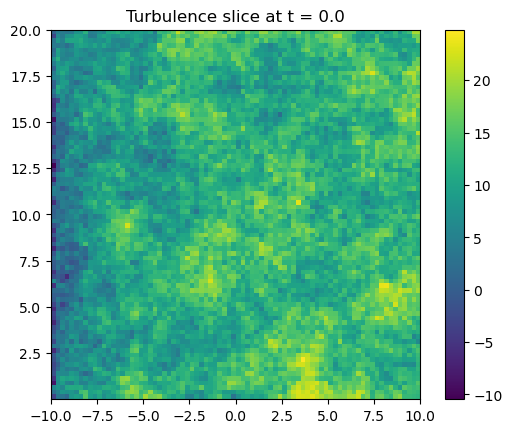

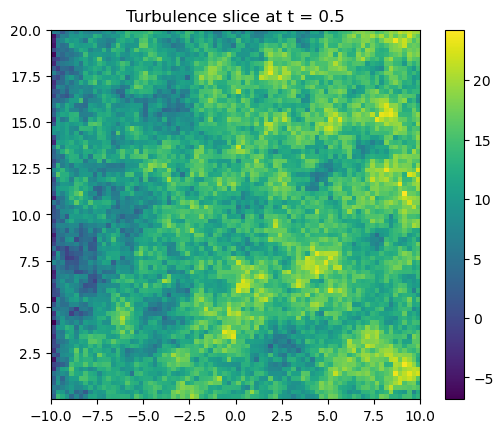

In [25]:
ts = [0.0, 0.5, 1.0] #, 4.0] [0, int(len(turb_df)/2), -1] #[0.0, 2.0] #, 4.0]

for t in ts:
    ax = plot_slice(spat_df, turb_df, val=t) #round(time[t],1))
    ax.set_title(f'Turbulence slice at t = {t}');
    # ax.set_title(f'Turbulence slice at t = {round(time[t],1)}');

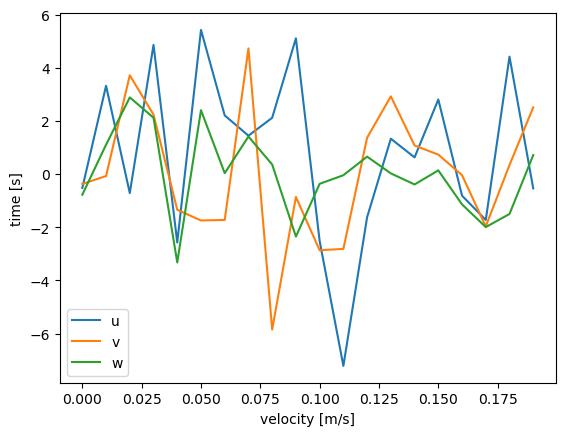

In [7]:
plt.plot(turb_df.u_p0, label='u')
plt.plot(turb_df.v_p0, label='v')
plt.plot(turb_df.w_p0, label='w')
plt.xlabel('velocity [m/s]')
plt.ylabel('time [s]')
plt.legend()

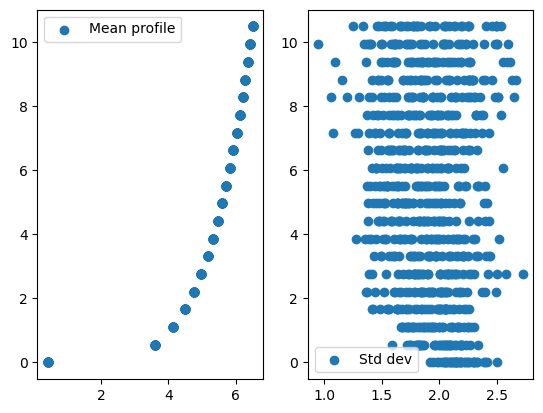

In [18]:
stats = turb_df.filter(regex='u_', axis=1).describe().loc[['mean', 'std']]
# plot
plt.clf(); plt.subplot(1, 2, 1);
plt.scatter(stats.loc['mean'], spat_df.filter(regex='u_').loc['z'], label='Mean profile')
plt.legend()
plt.subplot(1, 2, 2)
plt.scatter(stats.loc['std'], spat_df.filter(regex='u_').loc['z'], label='Std dev')
plt.legend();

In [26]:
# reshape to 3D array
data = {}
data['u'] = turb_df.filter(regex='u').values.reshape(len(turb_df),y.size,z.size).transpose((0, 2, 1))
data['v'] = turb_df.filter(regex='v').values.reshape(len(turb_df),y.size,z.size).transpose((0, 2, 1))
data['w'] = turb_df.filter(regex='w').values.reshape(len(turb_df),y.size,z.size).transpose((0, 2, 1))

# data['u'] = turb_df.filter(regex='u').values.reshape(len(turb_df),z.size,y.size)
# data['v'] = turb_df.filter(regex='v').values.reshape(len(turb_df),z.size,y.size)
# data['w'] = turb_df.filter(regex='w').values.reshape(len(turb_df),z.size,y.size)

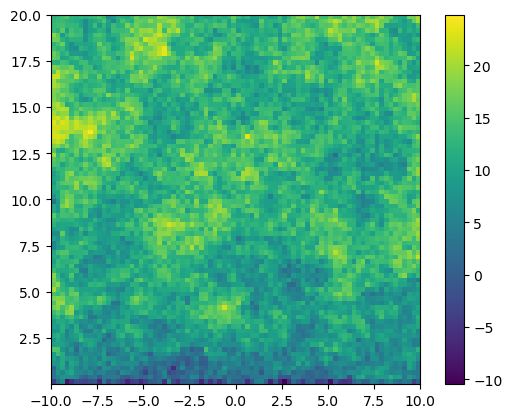

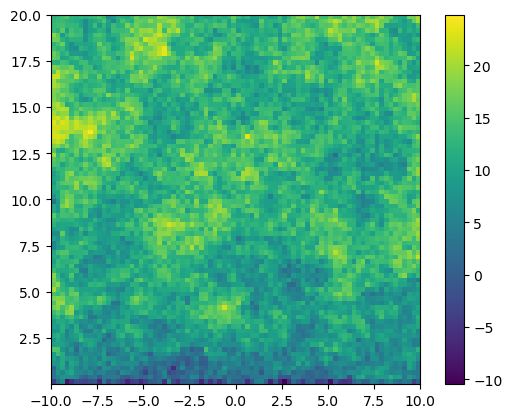

In [27]:
fig, ax = plt.subplots()
plt.imshow(data['u'][0,:,:],  # imshow requires nz-ny slice
            origin='lower',  # smallest y-z in lower left, not upper left
            extent=[y[0], y[-1], z[0], z[-1]],  # lateral and vertical limits
            interpolation='none')  # image smoothing
plt.colorbar()

# fig, ax = plt.subplots()
# plt.imshow(data['u'][0,:,:],  # imshow requires nz-ny slice
#             origin='lower',  # smallest y-z in lower left, not upper left
#             extent=[y[0], y[-1], z[0], z[-1]],  # lateral and vertical limits
#             interpolation='none')  # image smoothing
# plt.colorbar()

test_u = data['u'] #.transpose((0, 2, 1))

fig, ax = plt.subplots()
plt.imshow(test_u[0,:,:],  # imshow requires nz-ny slice
            origin='lower',  # smallest y-z in lower left, not upper left
            extent=[y[0], y[-1], z[0], z[-1]],  # lateral and vertical limits
            interpolation='none')  # image smoothing
plt.colorbar()

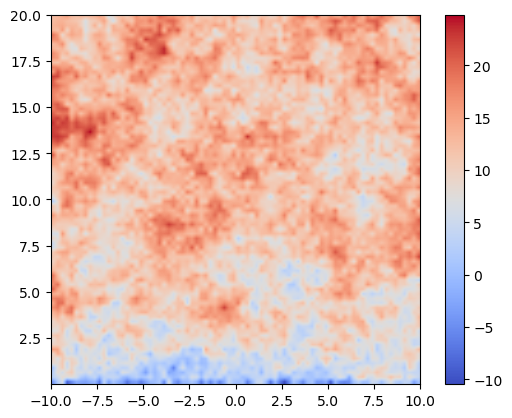

In [28]:
fig, ax = plt.subplots()
plt.imshow(data['u'][0,:,:],  # imshow requires nz-ny slice
            origin='lower',  # smallest y-z in lower left, not upper left
            extent=[y[0], y[-1], z[0], z[-1]],  # lateral and vertical limits
            interpolation='bilinear',
            cmap='coolwarm')  # image smoothing
plt.colorbar()

In [22]:
np.shape(data['u'])

(50, 20, 41)

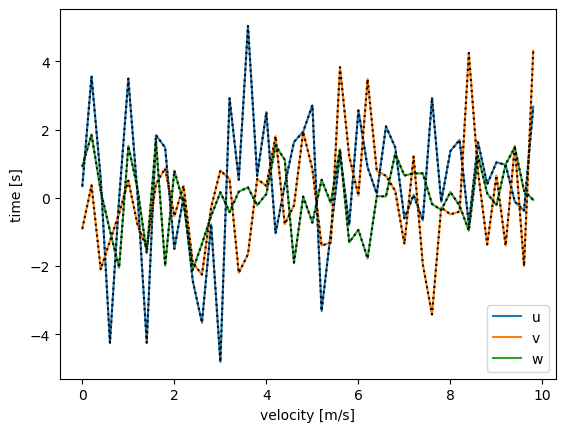

In [23]:
time = turb_df.index.values
fig, ax = plt.subplots()

ax.plot(turb_df.u_p0, label='u')
ax.plot(turb_df.v_p0, label='v')
ax.plot(turb_df.w_p0, label='w')
ax.plot(time,data['u'][:,0,0], 'k:', label='')
ax.plot(time,data['v'][:,0,0], 'k:', label='')
ax.plot(time,data['w'][:,0,0], 'k:', label='')
ax.set_xlabel('velocity [m/s]')
ax.set_ylabel('time [s]')
plt.legend()

u max =  12.887880299545088


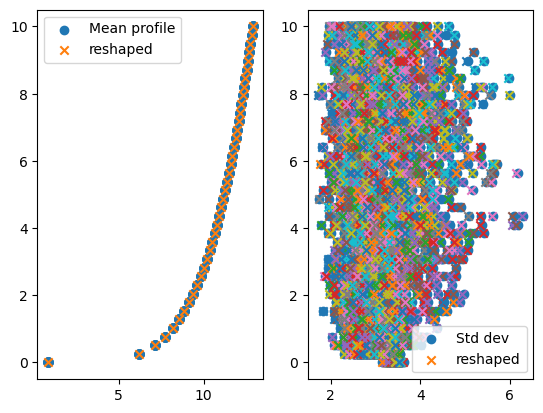

In [ ]:
stats = turb_df.filter(regex='u_', axis=1).describe().loc[['mean', 'std']]
# plot
plt.clf(); plt.subplot(1, 2, 1);
plt.scatter(stats.loc['mean'], spat_df.filter(regex='u_').loc['z'], label='Mean profile')
plt.scatter((data['u'].mean(axis=0)).mean(axis=1), z, marker='x', label='reshaped')
print('u max = ',np.max(stats.loc['mean']))

plt.legend()
plt.subplot(1, 2, 2)
plt.scatter(stats.loc['std'], spat_df.filter(regex='u_').loc['z'], label='Std dev')
for i in range(np.std(data['u'], axis=0).shape[1]):
    plt.scatter(np.std(data['u'], axis=0)[:,i], z, marker='x', label='reshaped' if i==0 else '')
plt.legend();

In [43]:
u_max = 6.4 #np.max(stats.loc['mean'])
dx = 0.75 # y[1]-y[0]
dt_pvade = 0.05
cfl_equiv = u_max * dt_pvade / dx
print(cfl_equiv)

0.42666666666666675


(np.float64(-11.0),
 np.float64(11.0),
 np.float64(-0.5249895000000001),
 np.float64(11.0249995))

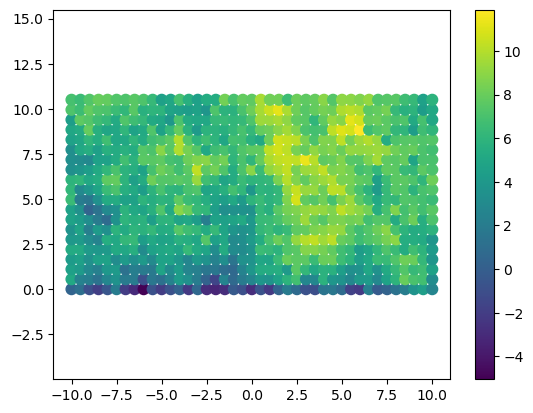

In [26]:
# yy_mesh, zz_mesh = np.meshgrid(y[:], z[:])
# cbar = plt.scatter(yy_mesh, zz_mesh, c=data['u'][0, :, :], s=60) #, vmin=0.5, vmax=2.7)
yy_mesh, zz_mesh = np.meshgrid(y[:], z[:])
cbar = plt.scatter(yy_mesh, zz_mesh, c=data['u'][0,:,:], s=60) #, vmin=0.5, vmax=2.7)

plt.colorbar(cbar)
plt.axis("equal")

In [29]:
with h5py.File("pct_turb_ny80_nz80_unconstrained_1s_dt01_uref20.h5", "w") as fp:
    fp.create_dataset("time_index", shape=(t_steps,))
    fp["time_index"][:] = time
    
    fp.create_dataset("y_coordinates", shape=(ny,))
    fp["y_coordinates"][:] = y
        
    fp.create_dataset("z_coordinates", shape=(nz,))
    fp["z_coordinates"][:] = z
        
    fp.create_dataset("u", shape=(t_steps, nz, ny))
    fp["u"][:] = data['u'][:]
    
    fp.create_dataset("v", shape=(t_steps, nz, ny))
    fp["v"][:] = data['v'][:]
    
    fp.create_dataset("w", shape=(t_steps, nz, ny))
    fp["w"][:] = data['w'][:]



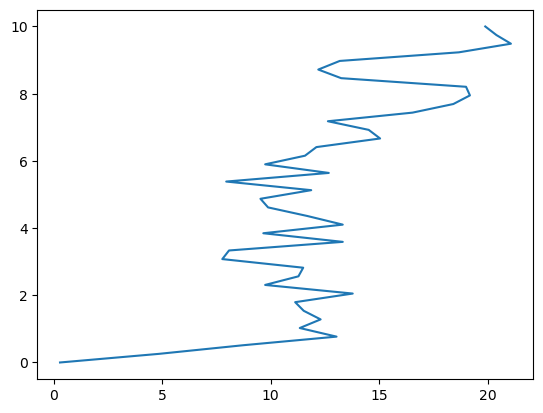

In [20]:
fig, ax = plt.subplots()
plt.plot(u_data[-1, :, 40], z_fp)

time_index (100,) float32
u (100, 40, 80) float32
v (100, 40, 80) float32
w (100, 40, 80) float32
y_coordinates (80,) float32
z_coordinates (40,) float32


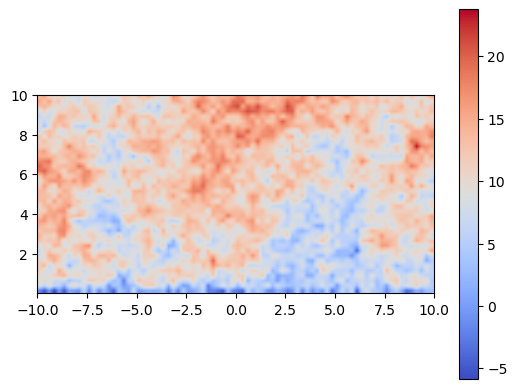

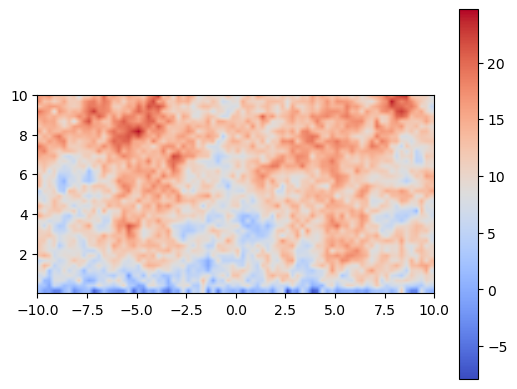

In [17]:
with h5py.File("pct_turb_ny80_nz40_unconstrained_1s_dt01_uref20.h5", "r") as fp:
    for key, val in fp.items():
        print(key, val.shape, val.dtype)
        
    # yy_mesh, zz_mesh = np.meshgrid(fp["y_coordinates"][:], fp["z_coordinates"][:])
    # cbar = plt.scatter(yy_mesh, zz_mesh, c=fp["u"][0, :, :], s=60, cmap='bwr') #, vmin=0.5, vmax=2.7)
    # plt.colorbar(cbar)
    # plt.axis("equal")

    y_fp = fp["y_coordinates"][:]
    z_fp = fp["z_coordinates"][:]

    u_data = fp["u"][:, :, :]

    fig, ax = plt.subplots()
    plt.imshow(fp["u"][0, :, :],  # imshow requires nz-ny slice
                origin='lower',  # smallest y-z in lower left, not upper left
                extent=[y_fp[0], y_fp[-1], z_fp[0], z_fp[-1]],  # lateral and vertical limits
                interpolation='bilinear',
                cmap='coolwarm')  # image smoothing
    plt.colorbar()

    fig, ax = plt.subplots()
    plt.imshow(fp["u"][50, :, :],  # imshow requires nz-ny slice
                origin='lower',  # smallest y-z in lower left, not upper left
                extent=[y_fp[0], y_fp[-1], z_fp[0], z_fp[-1]],  # lateral and vertical limits
                interpolation='bilinear',
                cmap='coolwarm')  # image smoothing
    plt.colorbar()

time_index (50,) float32
u (50, 20, 41) float32
v (50, 20, 41) float32
w (50, 20, 41) float32
y_coordinates (41,) float32
z_coordinates (20,) float32


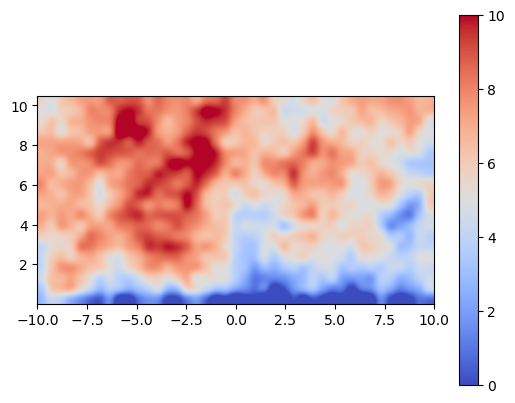

In [28]:
with h5py.File("pct_turb_data.h5", "r") as fp:
    for key, val in fp.items():
        print(key, val.shape, val.dtype)
        
    # yy_mesh, zz_mesh = np.meshgrid(fp["y_coordinates"][:], fp["z_coordinates"][:])
    # cbar = plt.scatter(yy_mesh, zz_mesh, c=fp["u"][0, :, :], s=60, cmap='bwr') #, vmin=0.5, vmax=2.7)
    # plt.colorbar(cbar)
    # plt.axis("equal")

    y_fp = fp["y_coordinates"][:]
    z_fp = fp["z_coordinates"][:]

    flipped_array = np.fliplr(fp["u"][0, :, :])

    fig, ax = plt.subplots()
    plt.imshow(flipped_array,  # imshow requires nz-ny slice
                origin='lower',  # smallest y-z in lower left, not upper left
                extent=[y_fp[0], y_fp[-1], z_fp[0], z_fp[-1]],  # lateral and vertical limits
                vmin=0.0, vmax=10.0,
                interpolation='gaussian',
                cmap='coolwarm')  # image smoothing
    plt.colorbar()

time_index (50,) float32
u (50, 20, 41) float32
v (50, 20, 41) float32
w (50, 20, 41) float32
y_coordinates (41,) float32
z_coordinates (20,) float32


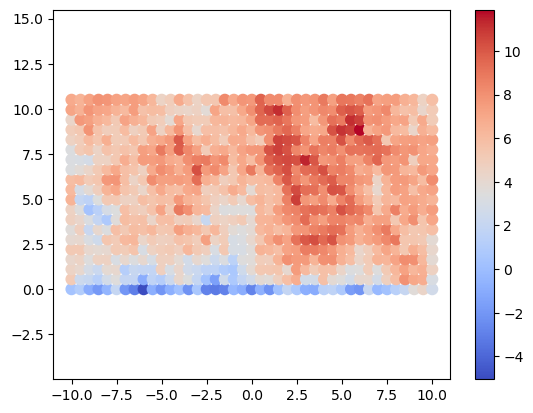

In [31]:
with h5py.File("pct_turb_data.h5", "r") as fp:
    for key, val in fp.items():
        print(key, val.shape, val.dtype)
        
    yy_mesh, zz_mesh = np.meshgrid(fp["y_coordinates"][:], fp["z_coordinates"][:])
    cbar = plt.scatter(yy_mesh, zz_mesh, c=fp["u"][0, :, :], s=60, cmap='coolwarm') #, vmin=0.5, vmax=2.7)
    plt.colorbar(cbar)
    plt.axis("equal")

In [30]:
?gen_turb

Signature:
gen_turb(
    spat_df,
    T=600,
    nt=600,
    con_tc=None,
    coh_model='iec',
    coh_file=None,
    wsp_func=None,
    sig_func=None,
    spec_func=None,
    interp_data='none',
    seed=None,
    nf_chunk=1,
    dtype=<class 'numpy.float64'>,
    verbose=False,
    **kwargs,
)
Docstring:
Generate a turbulence box (constrained or unconstrained).

Parameters
----------
spat_df : pandas.DataFrame
    Spatial information on the points to simulate. Must have rows `[k, x, y, z]`,
    and each of the `n_sp` columns corresponds to a different spatial location and
    turbine component (u, v or w).
T : float, optional
    Total length of time to simulate in seconds. Default is 600.
nt : int, optional
    Number of time steps for generated turbulence. Default is 600.
con_tc : pyconturb TimeConstraint, optional
    Optional constraining data for the simulation. The TimeConstraint object is built
    into PyConTurb; see documentation for more details.
coh_model : str, optional
 